In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)


from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

from imblearn.over_sampling import SMOTE

In [77]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [78]:
tr=train_df.copy()
te=test_df.copy()

In [79]:
tr.duplicated().sum()

0

In [80]:
tr.duplicated().sum()/tr.shape[0]

0.0

In [81]:
tr.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [82]:
te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [83]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [84]:
df1=tr.isnull().sum()[tr.isnull().sum()>0].to_frame().rename(columns={0:"Number of Missing values"})
df1['%m missing']=df1['Number of Missing values']/tr.shape[0]*100

In [85]:
df1

,Number of Missing values,%m missing
HomePlanet,201,2.312205
CryoSleep,217,2.496261
Cabin,199,2.289198
Destination,182,2.093639
Age,179,2.059128
VIP,203,2.335212
RoomService,181,2.082135
FoodCourt,183,2.105142
ShoppingMall,208,2.392730
Spa,183,2.105142


In [86]:
# train_df.isnull().sum()[train_df.isnull().sum()>0])#.to_frame().rename(columns={0:"Number of Missing values"})

In [87]:
tr.select_dtypes(include='object').nunique()

PassengerId    8693
HomePlanet        3
CryoSleep         2
Cabin          6560
Destination       3
VIP               2
Name           8473
dtype: int64

In [88]:
tr.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [89]:
cat=tr.select_dtypes(include='object')
for i in cat:
    if i!='PassengerId' and i!='Name' and i!='Cabin':
        print(i,'....',tr[i].unique())
        

HomePlanet .... ['Europa' 'Earth' 'Mars' nan]
CryoSleep .... [False True nan]
Destination .... ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
VIP .... [False True nan]


In [90]:
v=tr['Transported'].value_counts().values
v

array([4378, 4315], dtype=int64)

In [91]:
i=tr['Transported'].value_counts().index
i

Index([True, False], dtype='bool', name='Transported')

In [92]:
tr['Transported'].value_counts(normalize=True)*100

Transported
True     50.362361
False    49.637639
Name: proportion, dtype: float64

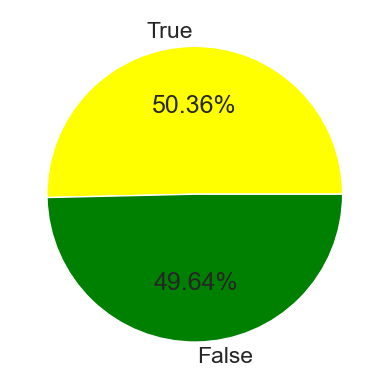

In [93]:
l=['yellow','green']
plt.pie(v,labels=i,autopct='%0.2f%%',colors=l);

<Axes: xlabel='Age', ylabel='Count'>

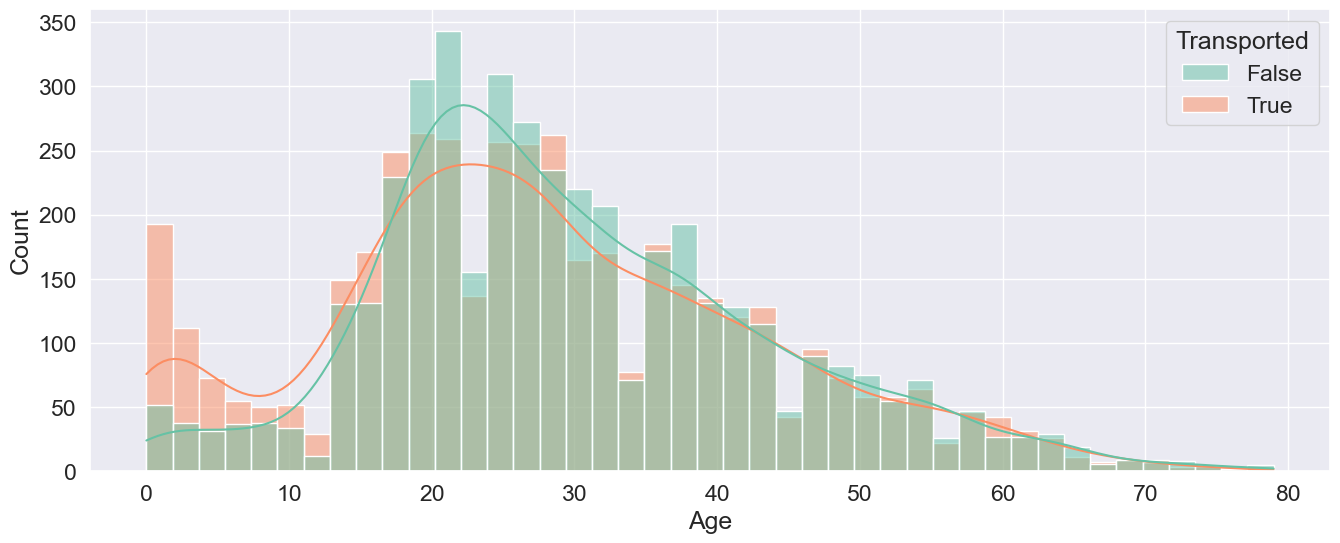

In [94]:
plt.figure(figsize=(16,6))

sns.histplot(x=tr["Age"],hue="Transported",data=tr,kde=True,palette="Set2")

In [95]:
tr.shape

(8693, 14)

In [96]:
tr["Group"] = tr["PassengerId"].apply(lambda x: x.split("_")[0])
tr["Member"] =tr["PassengerId"].apply(lambda x: x.split("_")[1])

In [97]:
s='0001_456'
s.split('_')[0]

'0001'

In [98]:
tr.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Member
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01


In [99]:
x=tr.groupby(['Group'])['Member'].count()
y=set(x[x>1].index)


In [100]:
tr["Travelling_Solo"]=tr["Group"].apply(lambda x: x not in y)

In [101]:
tr.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Member,Travelling_Solo
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,True
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,True


In [102]:
tr["Group_Size"]=0
tr.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Member,Travelling_Solo,Group_Size
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,True,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,True,0


In [103]:
for i in x.items():
    #pas#s
    #print(i)
    
    tr.loc[tr["Group"]==i[0],"Group_Size"]=i[1]

In [104]:
i[1]

2

In [105]:
tr.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Member,Travelling_Solo,Group_Size
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,True,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,True,1


In [106]:
tr.drop(columns=["Group","Member"],inplace=True)


In [107]:
tr.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Travelling_Solo,Group_Size
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True,1


# Continue

In [109]:
s='A/0/S'
print(s.split('/'))

A


In [111]:
tr["Cabin"].fillna("np.nan/np.nan/np.nan",inplace=True)  #In this way we can split NaN values into all three categories


In [112]:
tr["Cabin_Deck"] = tr["Cabin"].apply(lambda x: x.split("/")[0])

In [114]:
tr.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Travelling_Solo,Group_Size,Cabin_Deck
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True,1,B
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,1,F


In [115]:
tr["Cabin_Number"]  = tr["Cabin"].apply(lambda x: x.split("/")[1])
tr["Cabin_Side"] = tr["Cabin"].apply(lambda x: x.split("/")[2])

In [117]:
tr.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Travelling_Solo,Group_Size,Cabin_Deck,Cabin_Number,Cabin_Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True,1,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,1,F,0,S


In [118]:
cols = ["Cabin_Deck","Cabin_Number","Cabin_Side"]
tr[cols]=tr[cols].replace("np.nan",np.nan)

In [119]:
tr["Cabin_Deck"].fillna(tr["Cabin_Deck"].mode()[0],inplace=True)
tr["Cabin_Side"].fillna(tr["Cabin_Side"].mode()[0],inplace=True)
tr["Cabin_Number"].fillna(tr["Cabin_Number"].mode()[0],inplace=True)

In [120]:
tr["Cabin_Number"]=tr["Cabin_Number"].astype(int)

In [122]:
# print("Total Unique values present in Cabin_Number feature is:",train_df["Cabin_Number"].nunique())
# print("The Mean of Cabin_Number Feature is: ",train_df["Cabin_Number"].mean())
# print("The Median of Cabin_Number Feature is:",train_df["Cabin_Number"].median())
print("The Minimum value of Cabin_Number feature is:",tr["Cabin_Number"].min())
print("The Maximum value of Cabin_number Feature is:",tr["Cabin_Number"].max())

The Minimum value of Cabin_Number feature is: 0
The Maximum value of Cabin_number Feature is: 1894


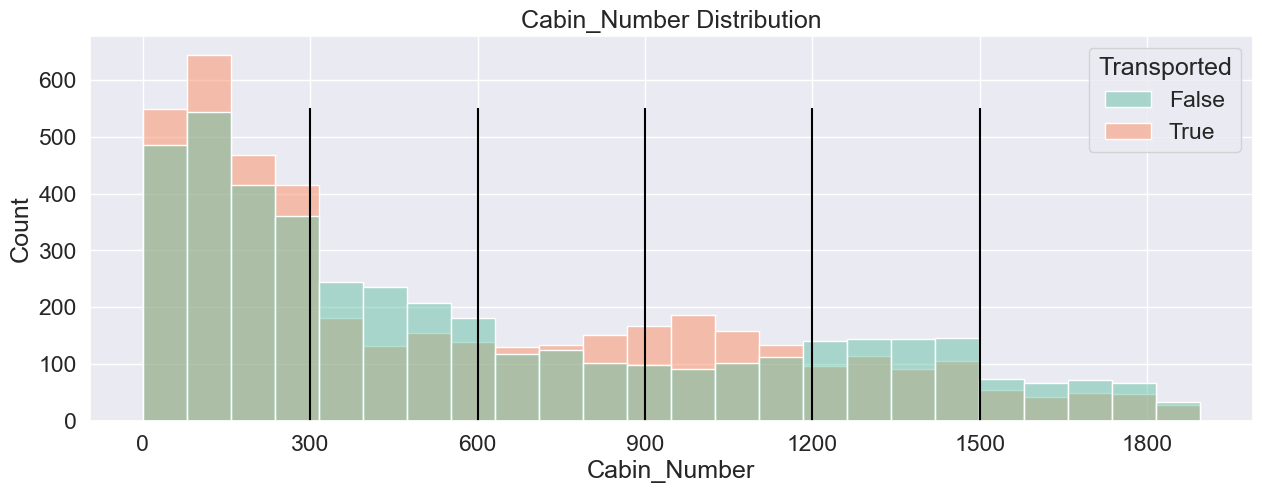

In [129]:
plt.figure(figsize=(15,5))
sns.histplot(x="Cabin_Number",data=tr,hue="Transported",palette="Set2")
plt.title("Cabin_Number Distribution")
plt.xticks(list(range(0,1900,300)))
plt.vlines(300,ymin=0,ymax=550,color="black")
plt.vlines(600,ymin=0,ymax=550,color="black")
plt.vlines(900,ymin=0,ymax=550,color="black")
plt.vlines(1200,ymin=0,ymax=550,color="black")
plt.vlines(1500,ymin=0,ymax=550,color="black")
plt.show()

In [136]:
tr["Cabin_Region1"] = (tr["Cabin_Number"]<300)
tr["Cabin_Region2"] = (tr["Cabin_Number"]>=300) & (tr["Cabin_Number"]<600)
tr["Cabin_Region3"] = (tr["Cabin_Number"]>=600) & (tr["Cabin_Number"]<900)
tr["Cabin_Region4"] = (tr["Cabin_Number"]>=900) & (tr["Cabin_Number"]<1200)
tr["Cabin_Region5"] = (tr["Cabin_Number"]>=1200) & (tr["Cabin_Number"]<1500)
tr["Cabin_Region6"] = (tr["Cabin_Number"]>=1500)

In [137]:
tr.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Travelling_Solo,Group_Size,Cabin_Deck,Cabin_Number,Cabin_Side,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True,1,B,0,P,True,False,False,False,False,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,1,F,0,S,True,False,False,False,False,False


In [138]:
age_group  = []
for i in tr["Age"]:
    if i<=12:
        age_group.append("Age_0-12")
    elif (i>12 and i<=18):
        age_group.append("Age_13-18")
    elif (i>18 and i<=25):
        age_group.append("Age_19-25")
    elif (i>25 and i<=32):
        age_group.append("Age_26-32")
    elif (i>32 and i<=50):
        age_group.append("Age_33_50")
    elif (i>50):
        age_group.append("age_50+")
    else:
        age_group.append(np.nan)
    
tr["Age Group"] = age_group

In [139]:
tr.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Travelling_Solo,Group_Size,Cabin_Deck,Cabin_Number,Cabin_Side,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Age Group
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True,1,B,0,P,True,False,False,False,False,False,Age_33_50
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,1,F,0,S,True,False,False,False,False,False,Age_19-25


In [140]:
exp_cols = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

In [142]:
tr["Total Expenditure"] = tr[exp_cols].sum(axis=1)

In [146]:
tr["No Spending"] = (tr["Total Expenditure"]==0)

In [147]:
expense_category = []
    
for i in tr["Total Expenditure"]:
    if i==0:
        expense_category.append("No Expense")
    elif (i>0 and i<=716):
        expense_category.append("Low Expense")
    elif (i>716 and i<=1441):
        expense_category.append("Medium Expense")
    elif (i>1441):
        expense_category.append("High Expense")

tr["Expenditure Category"] = expense_category

In [168]:
z = train_df.isnull().sum()[train_df.isnull().sum()>0].to_frame().rename(columns={0:"No. of Missing values"})
z["% of Missing values"] = round(train_df.isnull().sum()[train_df.isnull().sum()>0]*100/len(train_df),2)
z

,No. of Missing values,% of Missing values
HomePlanet,201,2.31
CryoSleep,217,2.50
Cabin,199,2.29
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11


In [167]:
z=train_df.isnull().sum()[tr.isnull().sum()>0].to_frame().rename(columns={0:"No. of Missing values"})
z

,No. of Missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PassengerId           8693 non-null   object 
 1   HomePlanet            8492 non-null   object 
 2   CryoSleep             8476 non-null   object 
 3   Cabin                 8693 non-null   object 
 4   Destination           8511 non-null   object 
 5   Age                   8514 non-null   float64
 6   VIP                   8490 non-null   object 
 7   RoomService           8512 non-null   float64
 8   FoodCourt             8510 non-null   float64
 9   ShoppingMall          8485 non-null   float64
 10  Spa                   8510 non-null   float64
 11  VRDeck                8505 non-null   float64
 12  Name                  8493 non-null   object 
 13  Transported           8693 non-null   bool   
 14  Travelling_Solo       8693 non-null   bool   
 15  Group_Size           

In [162]:
cat_cols=tr.select_dtypes(include=["object","bool"]).columns.tolist()
print(cat_cols)

['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name', 'Transported', 'Travelling_Solo', 'Cabin_Deck', 'Cabin_Side', 'Cabin_Region1', 'Cabin_Region2', 'Cabin_Region3', 'Cabin_Region4', 'Cabin_Region5', 'Cabin_Region6', 'Age Group', 'No Spending', 'Expenditure Category']


In [159]:
num_cols=tr.select_dtypes(include=["int","float"]).columns.tolist()

In [160]:
imputer1 = SimpleImputer(strategy="most_frequent")     ##To fill Categorical Features.

In [161]:
imputer2 = SimpleImputer(strategy="median")            ##To fill numeircal features.

In [164]:
tr[cat_cols]=imputer1.fit_transform(tr[cat_cols])

In [166]:
tr[num_cols] = imputer2.fit_transform(tr[num_cols])

In [171]:
pass_df = test_df[["PassengerId"]]
pass_df

,PassengerId
0,0013_01
1,0018_01
2,0019_01
3,0021_01
4,0023_01
5,0027_01
6,0029_01
7,0032_01
8,0032_02
9,0033_01


In [173]:
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
5,0027_01,Earth,False,F/7/P,TRAPPIST-1e,31.0,False,0.0,1615.0,263.0,113.0,60.0,Karlen Ricks
6,0029_01,Europa,True,B/2/P,55 Cancri e,21.0,False,0.0,NaN,0.0,0.0,0.0,Aldah Ainserfle
7,0032_01,Europa,True,D/0/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Acrabi Pringry
8,0032_02,Europa,True,D/0/S,55 Cancri e,23.0,False,0.0,0.0,0.0,0.0,0.0,Dhena Pringry
9,0033_01,Earth,False,F/7/S,55 Cancri e,24.0,False,0.0,639.0,0.0,0.0,0.0,Eliana Delazarson


In [174]:
import pandas as pd
import seaborn as sns

In [187]:
df=sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [179]:
a=df.groupby(['day'])['total_bill'].sum().reset_index()
a

,day,total_bill
0,Thur,1096.33
1,Fri,325.88
2,Sat,1778.40
3,Sun,1627.16


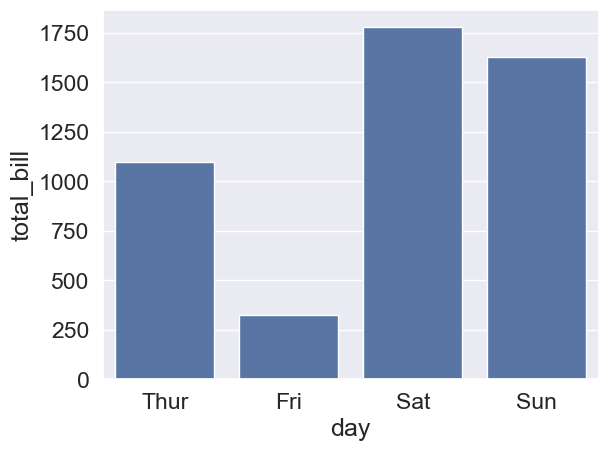

In [180]:
sns.barplot(x='day',y='total_bill',data=a);

In [181]:
df['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [185]:
df['sex'].value_counts(normalize=True)*100

sex
Male      64.344262
Female    35.655738
Name: proportion, dtype: float64

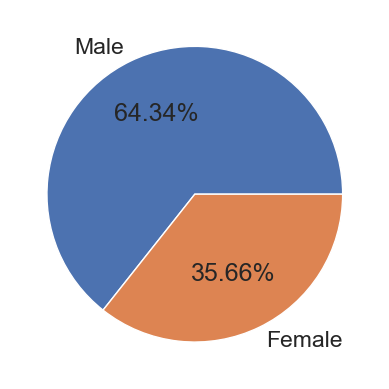

In [183]:
plt.pie(df['sex'].value_counts().values,labels=df['sex'].value_counts().index,autopct='%0.2f%%');

<Axes: xlabel='total_bill', ylabel='tip'>

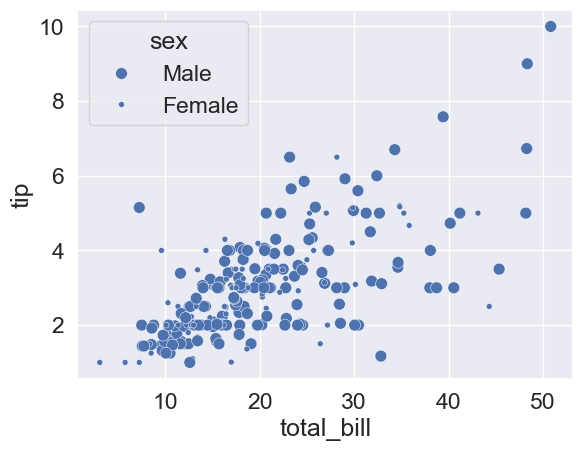

In [192]:
sns.scatterplot(x='total_bill',y='tip',size='sex',data=df)